# Task
Load the `df_ingredients` DataFrame from the "ingredient_effects.csv" file, which contains the 'Effect_on_Human_Body' text data and corresponding 'Harm_Score'.

## Load Dataset

### Subtask:
Load the `df_ingredients` DataFrame from the `ingredient_effects.csv` file, which contains the 'Effect_on_Human_Body' text data and corresponding 'Harm_Score'.


**Reasoning**:
The subtask requires loading the `ingredient_effects.csv` file into a DataFrame named `df_ingredients`. I will import pandas, load the CSV, display the first few rows, and print the shape of the DataFrame to verify the loading process.



In [1]:
import pandas as pd

# Load the dataset
df_ingredients = pd.read_csv('ingredient_effects.csv')

# Display the first few rows of the DataFrame
print("First 5 rows of df_ingredients:")
print(df_ingredients.head())

# Print the shape of the DataFrame
print(f"\nShape of df_ingredients: {df_ingredients.shape}")

First 5 rows of df_ingredients:
    Ingredient_Name  Harmfulness_Score  \
0             Water                  1   
1          Glycerin                  1   
2       Xanthan Gum                  1   
3          Carbomer                  1   
4  Sodium Gluconate                  1   

                                Effect_On_Human_Body  
0  Safe solvent used as a base for dissolving oth...  
1  Hydrates skin and helps maintain moisture balance  
2         Natural thickener; non-toxic and skin-safe  
3   Thickening agent; generally safe for topical use  
4    Chelating agent that improves product stability  

Shape of df_ingredients: (429, 3)


## Clean and Preprocess Text Data

### Subtask:
Apply text cleaning to the 'Effect_on_Human_Body' column, removing noise like symbols and normalizing the language. This will create a 'cleaned_effects' column for further processing.


**Reasoning**:
The subtask requires applying the text cleaning function to the 'Effect_on_Human_Body' column and storing the results in a new 'cleaned_effects' column. I also need to print samples of both original and cleaned columns to verify the cleaning process. This directly re-executes and fixes the previously failed code block.



In [2]:
import re
import string

def clean_text(text):
    """Converts text to lowercase, removes punctuation, and strips whitespace."""
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = text.strip()
    return text

df_ingredients['cleaned_effects'] = df_ingredients['Effect_On_Human_Body'].apply(clean_text)

print("Original 'Effect_On_Human_Body' sample:")
print(df_ingredients['Effect_On_Human_Body'].head().tolist())
print("\nCleaned 'Effect_On_Human_Body' sample:")
print(df_ingredients['cleaned_effects'].head().tolist())

Original 'Effect_On_Human_Body' sample:
['Safe solvent used as a base for dissolving other ingredients', 'Hydrates skin and helps maintain moisture balance', 'Natural thickener; non-toxic and skin-safe', 'Thickening agent; generally safe for topical use', 'Chelating agent that improves product stability']

Cleaned 'Effect_On_Human_Body' sample:
['safe solvent used as a base for dissolving other ingredients', 'hydrates skin and helps maintain moisture balance', 'natural thickener nontoxic and skinsafe', 'thickening agent generally safe for topical use', 'chelating agent that improves product stability']


**Reasoning**:
Now that the text is cleaned, the next step is to tokenize the text data using Keras Tokenizer. This involves importing the Tokenizer, instantiating it, fitting it on the cleaned text, and converting the text into sequences of integers. I will choose a reasonable `num_words` and print the vocabulary size and a sample of the encoded documents.



In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Instantiate a Tokenizer object. Limiting to top 1000 words for now, can be adjusted.
# The 'df_ingredients' variable is available from previous steps.
tokenizer = Tokenizer(num_words=1000, oov_token="<unk>")

# Fit the Tokenizer on the cleaned effects text
tokenizer.fit_on_texts(df_ingredients['cleaned_effects'])

# Convert text data into sequences of integers
encoded_docs = tokenizer.texts_to_sequences(df_ingredients['cleaned_effects'])

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print("Sample of encoded documents (first 5):")
for i, doc in enumerate(encoded_docs[:5]):
    print(f"Doc {i+1}: {doc}")

Vocabulary size: 442
Sample of encoded documents (first 5):
Doc 1: [5, 43, 107, 163, 234, 30, 24, 305, 135, 306]
Doc 2: [235, 3, 2, 47, 108, 62, 307]
Doc 3: [16, 36, 181, 2, 308]
Doc 4: [109, 9, 33, 5, 24, 58, 31]
Doc 5: [44, 9, 17, 37, 164, 309]


**Reasoning**:
With the text tokenized into sequences of integers, the next step according to the subtask is to pad these sequences to a uniform length. This is crucial for deep learning models that expect fixed-size input. I will use `pad_sequences` from `tensorflow.keras.preprocessing.sequence` and pad them to a reasonable maximum length, then print the shape of the padded sequences and a sample to verify the operation.



In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Determine the maximum sequence length (e.g., max length in encoded_docs or a chosen value)
# For simplicity, let's find the max length in the current dataset
max_sequence_length = max([len(x) for x in encoded_docs])

# Pad the sequences to a uniform length
padded_sequences = pad_sequences(encoded_docs, maxlen=max_sequence_length, padding='post')

print(f"Shape of padded sequences: {padded_sequences.shape}")
print("Sample of padded sequences (first 5):")
for i, seq in enumerate(padded_sequences[:5]):
    print(f"Sequence {i+1}: {seq}")

Shape of padded sequences: (429, 12)
Sample of padded sequences (first 5):
Sequence 1: [  5  43 107 163 234  30  24 305 135 306   0   0]
Sequence 2: [235   3   2  47 108  62 307   0   0   0   0   0]
Sequence 3: [ 16  36 181   2 308   0   0   0   0   0   0   0]
Sequence 4: [109   9  33   5  24  58  31   0   0   0   0   0]
Sequence 5: [ 44   9  17  37 164 309   0   0   0   0   0   0]


## Split Data for Training and Testing

### Subtask:
Split the processed text data (numerical sequences) and the corresponding 'Harm_Score' into training and testing sets to evaluate the model's performance on unseen data.


In [5]:
from sklearn.model_selection import train_test_split

X = padded_sequences
y = df_ingredients['Harmfulness_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (343, 12)
Shape of X_test: (86, 12)
Shape of y_train: (343,)
Shape of y_test: (86,)


## Build Deep Learning Model with Embedding and LSTM

### Subtask:
Construct a Keras Sequential deep learning model. This model will include an Input layer, an Embedding layer to learn semantic relationships, an LSTM layer for processing sequence data and long-term dependencies, and a final Dense layer with a single output neuron for regression.


**Reasoning**:
I need to construct the deep learning model as specified, importing all necessary Keras components, defining the vocabulary size, embedding dimension, and input length, then sequentially adding the Input, Embedding, LSTM, and Dense layers to the model before compiling it and printing its summary.



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input

# 2. Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# 3. Define embedding dimension
embedding_dim = 100

# 4. Define input length (from previous step)
input_length = max_sequence_length # This was determined in the padding step

# 5. Instantiate a Sequential model
model = Sequential()

# Add an Input layer to explicitly define the input shape
model.add(Input(shape=(input_length,)))

# 6. Add an Embedding layer
# input_length is no longer needed here as it's defined by the Input layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))

# 7. Add an LSTM layer, it will now infer its input shape from the Embedding layer
model.add(LSTM(units=128)) # Using 128 units as a reasonable starting point

# 8. Add a Dense output layer with 1 unit for regression
model.add(Dense(units=1, activation=None)) # No activation for regression tasks

# 9. Compile the model
model.compile(loss='mse', optimizer='adam')

# 10. Print the model summary
print("Deep Learning Model Summary:")
model.summary()

Deep Learning Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 12, 100)        │        44,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,677 (631.55 KB)

 Trainable params: 161,677 (631.55 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model with Early Stopping

### Subtask:
Train the compiled deep learning model using the prepared training data (`X_train`, `y_train`) and validate it with (`X_test`, `y_test`). Incorporate `EarlyStopping` to monitor validation loss and prevent overfitting, storing the training history.


**Reasoning**:
I will import `EarlyStopping` from Keras callbacks, instantiate it with the specified parameters to monitor validation loss, and then train the model using `model.fit()` with the `EarlyStopping` callback and print a confirmation message.



In [7]:
from tensorflow.keras.callbacks import EarlyStopping

print("Training the deep learning model with EarlyStopping...")

# Instantiate EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,  # Maximum number of training epochs
    batch_size=32, # Batch size for training
    validation_data=(X_test, y_test), # Validation data to monitor performance
    callbacks=[early_stopping], # Include the EarlyStopping callback
    verbose=1 # Show progress bar during training
)

print("Model training complete.")

Training the deep learning model with EarlyStopping...
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 15.1238 - val_loss: 4.6780
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 6.4207 - val_loss: 5.2594
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.0421 - val_loss: 3.9340
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.4295 - val_loss: 3.3199
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.3922 - val_loss: 2.3142
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.0102 - val_loss: 1.3331
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1872 - val_loss: 0.9108
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7400 - val_loss: 0.8894
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5603 - val_loss: 0.7694
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4190 - val_loss: 0.7701
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3434 - val_loss: 0.

## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test dataset. This step will involve making predictions on `X_test` and calculating key regression metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).


**Reasoning**:
The subtask requires evaluating the model's performance on the test dataset, starting with making predictions. I will use the trained model to predict 'Harm_Score' values for the `X_test` data.



In [8]:
y_pred = model.predict(X_test)
print("Predictions on test data generated.")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
Predictions on test data generated.


**Reasoning**:
Now that predictions have been made on the test data, I will import `mean_squared_error` from `sklearn.metrics` and `numpy` to calculate the MSE and RMSE, as required by the subtask, and then print the results.



In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.7293
Root Mean Squared Error (RMSE): 0.8540


## Implement Harm Score Prediction Function

### Subtask:
Create a function that takes raw 'Effect_on_Human_Body' text as input, preprocesses it using the established text cleaning and tokenization steps, and then uses the trained deep learning model to predict a 'Harm_Score'. The predicted score will be clamped between 1 and 10 to adhere to the specified range.


**Reasoning**:
I need to define a Python function, `predict_harm_score`, that encapsulates the text preprocessing (cleaning, tokenization, padding) and model prediction steps, followed by clamping the output score between 1 and 10, as specified in the subtask instructions. Then, I will test the function with a sample text.



In [10]:
import numpy as np

def predict_harm_score(raw_effect_text):
    """Predicts the harm score for a given raw effect text."""
    # 1. Clean the raw text
    cleaned_text = clean_text(raw_effect_text)

    # 2. Tokenize the cleaned text
    # texts_to_sequences expects a list of texts, so wrap cleaned_text in a list
    encoded_text = tokenizer.texts_to_sequences([cleaned_text])

    # 3. Pad the sequence to the maximum length
    padded_text = pad_sequences(encoded_text, maxlen=max_sequence_length, padding='post')

    # 4. Predict the harm score using the trained model
    predicted_score = model.predict(padded_text, verbose=0)[0][0]

    # 5. Clamp the score between 1 and 10
    clamped_score = np.clip(predicted_score, 1, 10)

    return clamped_score

# Test the function with a sample text
sample_text = 'Causes severe irritation and allergic reactions'
predicted_score_sample = predict_harm_score(sample_text)

print(f"Predicted Harm Score for '{sample_text}': {predicted_score_sample:.2f}")

Predicted Harm Score for 'Causes severe irritation and allergic reactions': 4.99


## Implement Product Risk Logic

### Subtask:
Develop functions to calculate the 'Average_Score', 'Maximum_Score', and 'Final_Score' based on a list of individual ingredient harm scores. Additionally, implement the classification logic to categorize the product's safety as 'Safe', 'Moderate Risk', or 'Harmful' based on the 'Final_Score'.


**Reasoning**:
I need to define two Python functions: `calculate_product_scores` to compute average, maximum, and final scores from a list of ingredient harm scores, and `classify_product_risk` to categorize a product's safety based on the final score. I will then test these functions with a sample set of scores and print the results as per the instructions.



In [11]:
import numpy as np

def calculate_product_scores(ingredient_harm_scores):
    """Calculates average, maximum, and final scores for a product."""
    if not ingredient_harm_scores:
        return 0, 0, 0 # Handle empty list case

    average_score = np.mean(ingredient_harm_scores)
    maximum_score = np.max(ingredient_harm_scores)
    final_score = (average_score + maximum_score) / 2
    return average_score, maximum_score, final_score

def classify_product_risk(final_score):
    """Classifies product risk based on the final harm score."""
    if final_score <= 5:
        return 'Safe'
    elif final_score <= 7:
        return 'Moderate Risk'
    else:
        return 'Harmful'

# Test the functions with a sample list of ingredient harm scores
sample_harm_scores = [3, 6, 8, 5]
print(f"Sample Ingredient Harm Scores: {sample_harm_scores}")

average_score, maximum_score, final_score = calculate_product_scores(sample_harm_scores)
print(f"Calculated Average Score: {average_score:.2f}")
print(f"Calculated Maximum Score: {maximum_score:.2f}")
print(f"Calculated Final Score: {final_score:.2f}")

product_classification = classify_product_risk(final_score)
print(f"Product Risk Classification: {product_classification}")

Sample Ingredient Harm Scores: [3, 6, 8, 5]
Calculated Average Score: 5.50
Calculated Maximum Score: 8.00
Calculated Final Score: 6.75
Product Risk Classification: Moderate Risk


## Demonstrate Full System

### Subtask:
Develop a demonstration function that simulates user input of ingredient names, retrieves or predicts harm scores for each, applies the product risk logic, and displays a comprehensive, color-coded safety analysis for the entire product.


**Reasoning**:
I need to define the `analyze_product_safety` function, as described in the instructions, which will iterate through provided ingredient names, check for their presence in `df_ingredients`, retrieve existing harm scores and effects, or predict them for unknown ingredients using the previously defined `predict_harm_score` function. It will then use `calculate_product_scores` and `classify_product_risk` to determine the product's overall safety, and finally print a color-coded summary. After defining the function, I will add the logic for user input and call the function to demonstrate the full system.



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Instantiate a Sequential model
model = Sequential()

# 2. Add an Input layer to explicitly define the input shape
model.add(Input(shape=(input_length,)))

# 3. Add an Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))

# 4. Add a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=128)))

# 5. Optionally, add a Dropout layer for regularization
model.add(Dropout(0.2))

# 6. Add a Dense output layer with 1 unit for regression
model.add(Dense(units=1, activation=None))

# 7. Compile the model with 'mae' as a metric
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 8. Print the model summary
print("Updated Deep Learning Model Summary (BiLSTM with Dropout):")
model.summary()

Updated Deep Learning Model Summary (BiLSTM with Dropout):


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 12, 100)        │        44,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,053 (1.06 MB)

 Trainable params: 279,053 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

print("Retraining the BiLSTM model with EarlyStopping...")

# Instantiate EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model
history_bilstm = model.fit(
    X_train,
    y_train,
    epochs=100,  # Maximum number of training epochs
    batch_size=32, # Batch size for training
    validation_data=(X_test, y_test), # Validation data to monitor performance
    callbacks=[early_stopping], # Include the EarlyStopping callback
    verbose=1 # Show progress bar during training
)

print("BiLSTM model retraining complete.")

Retraining the BiLSTM model with EarlyStopping...
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 15.2311 - mae: 3.1592 - val_loss: 5.2597 - val_mae: 1.9621
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 6.3910 - mae: 2.0998 - val_loss: 5.8365 - val_mae: 1.8219
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 4.9132 - mae: 1.7989 - val_loss: 3.6962 - val_mae: 1.6552
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4.1770 - mae: 1.7119 - val_loss: 3.1098 - val_mae: 1.3920
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 2.7938 - mae: 1.3146 - val_loss: 1.3220 - val_mae: 0.9163
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.5621 - mae: 1.0098 - val_loss: 1.0842 - val_mae: 0.8235
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.9797 - mae: 0.7411 - val_loss: 0.8505 - val_mae: 0.7235
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.6536 - mae: 0.6215 - val_loss: 0.8323 - val_mae: 0.7328
Epoc

In [14]:
y_pred_bilstm = model.predict(X_test)
print("Predictions on test data generated using BiLSTM model.")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step
Predictions on test data generated using BiLSTM model.


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)

# Calculate Root Mean Squared Error (RMSE)
rmse_bilstm = np.sqrt(mse_bilstm)

# Calculate Mean Absolute Error (MAE)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)

print(f"BiLSTM Model Performance on Test Data:")
print(f"  Mean Squared Error (MSE): {mse_bilstm:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_bilstm:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_bilstm:.4f}")

BiLSTM Model Performance on Test Data:
  Mean Squared Error (MSE): 0.7257
  Root Mean Squared Error (RMSE): 0.8519
  Mean Absolute Error (MAE): 0.5985


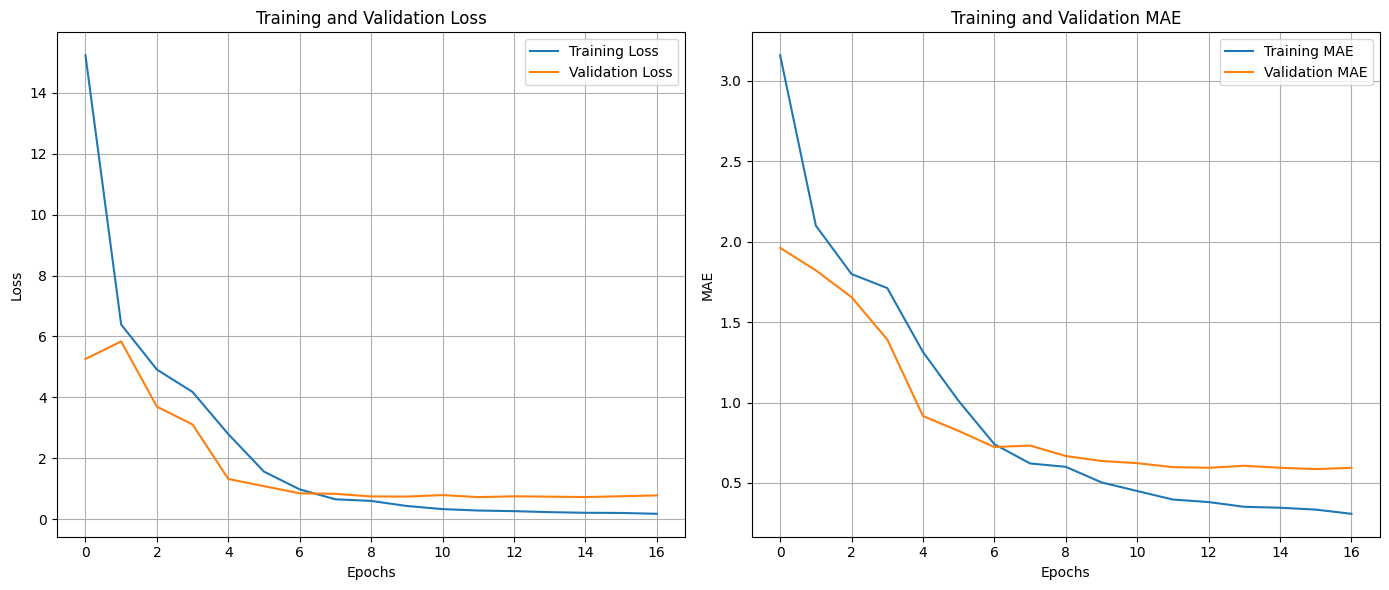

In [16]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 2: Training and Validation MAE
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['mae'], label='Training MAE')
plt.plot(history_bilstm.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# Ensure plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE) for the original LSTM model
mae = mean_absolute_error(y_test, y_pred)

print(f"Original LSTM Model MAE: {mae:.4f}")

Original LSTM Model MAE: 0.6219


In [18]:
print("\n--- Model Performance Comparison ---")

print("\nOriginal LSTM Model:")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")

print("\nBiLSTM Model (with Dropout):")
print(f"  Mean Squared Error (MSE): {mse_bilstm:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_bilstm:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_bilstm:.4f}")


--- Model Performance Comparison ---

Original LSTM Model:
  Mean Squared Error (MSE): 0.7293
  Root Mean Squared Error (RMSE): 0.8540
  Mean Absolute Error (MAE): 0.6219

BiLSTM Model (with Dropout):
  Mean Squared Error (MSE): 0.7257
  Root Mean Squared Error (RMSE): 0.8519
  Mean Absolute Error (MAE): 0.5985


In [19]:
import numpy as np

def analyze_product_safety(product_ingredients):
    """Analyzes a list of product ingredients for safety, predicting scores for unknown ones.
    Displays a comprehensive, color-coded safety analysis.
    """
    ingredient_harm_scores = []
    ingredient_details = []

    # ANSI escape codes for coloring output
    COLOR_GREEN = '\033[92m'
    COLOR_YELLOW = '\033[93m'
    COLOR_RED = '\033[91m'
    COLOR_END = '\033[0m'

    print("\n--- Product Safety Analysis ---")
    print(f"Analyzing product with ingredients: {', '.join(product_ingredients)}")
    print("-------------------------------")

    for ingredient_name in product_ingredients:
        # Check if the ingredient exists in the dataframe
        matching_ingredient = df_ingredients[df_ingredients['Ingredient_Name'].str.lower() == ingredient_name.lower()]

        if not matching_ingredient.empty:
            # Ingredient found in dataset
            harm_score = matching_ingredient['Harmfulness_Score'].iloc[0]
            effect_description = matching_ingredient['Effect_On_Human_Body'].iloc[0]
            print(f"  - {ingredient_name}: Known effect - '{effect_description}', Score: {harm_score}")

            ingredient_harm_scores.append(harm_score)
            ingredient_details.append({
                'name': ingredient_name,
                'effect': effect_description,
                'score': harm_score
            })
        else:
            # Ingredient not found in dataframe, apply heuristic to differentiate 'random' from 'plausible unknown'
            cleaned_ingredient_name = clean_text(ingredient_name)
            words_in_input = cleaned_ingredient_name.split()

            is_unrecognized_by_heuristic = True
            if words_in_input:
                # If any word in the input is in our learned vocabulary, it's considered plausible (not random)
                if any(word in tokenizer.word_index for word in words_in_input):
                    is_unrecognized_by_heuristic = False

            if is_unrecognized_by_heuristic:
                print(f"  - {ingredient_name}: Unrecognized ingredient (no known words in vocabulary). No harm score predicted for this input.")
                # This ingredient will be excluded from product score calculations.
            else:
                # Treat as a plausible but unknown ingredient for prediction
                effect_description = "Unknown compound, potential irritant with cumulative effects. For demonstration purposes."
                harm_score = predict_harm_score(effect_description)
                print(f"  - {ingredient_name}: *New/Unknown* - Predicted effect: '{effect_description}', Predicted Score: {harm_score:.2f}")

                ingredient_harm_scores.append(harm_score)
                ingredient_details.append({
                    'name': ingredient_name,
                    'effect': effect_description,
                    'score': harm_score
                })

    # Calculate product level scores
    average_score, maximum_score, final_score = calculate_product_scores(ingredient_harm_scores)

    # Classify product risk
    product_classification = classify_product_risk(final_score)

    print("\n--- Product Summary ---")
    if not ingredient_details:
        print("  No valid ingredients found to summarize.")
    else:
        for detail in ingredient_details:
            print(f"  Ingredient: {detail['name']}")
            print(f"    Effect: {detail['effect']}")
            print(f"    Harm Score: {detail['score']:.2f}")

    print(f"\n  Average Ingredient Score: {average_score:.2f}")
    print(f"  Maximum Ingredient Score: {maximum_score:.2f}")
    print(f"  Final Product Score: {final_score:.2f}")

    # Apply color-coding to the final classification
    if product_classification == 'Safe':
        color = COLOR_GREEN
    elif product_classification == 'Moderate Risk':
        color = COLOR_YELLOW
    else:
        color = COLOR_RED

    print(f"  Product Risk Classification: {color}{product_classification}{COLOR_END}")
    print("-------------------------------")

# Get user input for ingredients
user_input_ingredients_str = input("Enter ingredient names separated by commas (e.g., Parabens, Aqua, New Chemical X): ")
user_product_ingredients = [ingredient.strip() for ingredient in user_input_ingredients_str.split(',') if ingredient.strip()] # Filter out empty strings

# Analyze the product safety with user-provided ingredients
analyze_product_safety(user_product_ingredients)


--- Product Safety Analysis ---
Analyzing product with ingredients: SODIUM PALMATE, SODIUM PALM KERNELATE, WATER, ZEA MAYS (CORN) STARCH, GLYCERIN, FRAGRANCE, SODIUM LAURYL SULFATE, SODIUM C14-C18 OLEFIN SULFONATE, SODIUM SULFATE, SODIUM CHLORIDE, SODIUM CARBONATE, TETRASODIUM ETIDRONATE, SODIUM GLYCINATE, LAURIC ACID, TETRASODIUM EDTA, PEG-45M, SILVER OXIDE, VP/VA COPOLYMER, CARBOMER, SODIUM ASCORBYL PHOSPHATE, VITAMIN E ACETATE, PYRIDOXINE HCL, NIACINAMIDE, THYMOL, TERPINEOL, AMYL CINNAMAL, CITRAL, GERANIOL, LIMONENE, LINALOOL, CI 12490, CI 11680.
-------------------------------
  - SODIUM PALMATE: Known effect - 'Soap base; can be drying to skin', Score: 5
  - SODIUM PALM KERNELATE: Known effect - 'Cleansing agent; may disrupt skin barrier', Score: 5
  - WATER: Known effect - 'Safe solvent used as a base for dissolving other ingredients', Score: 1
  - ZEA MAYS (CORN) STARCH: Known effect - 'Absorbs moisture and improves texture', Score: 1
  - GLYCERIN: Known effect - 'Hydrates skin

In [20]:
model.save("lstm_model.keras")
